In [1]:
import pandas as pd # type: ignore
import talib # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore
import pynance as pn # type: ignore
import numpy as np # type: ignore

def load_data(filepath):
    data = pd.read_csv(filepath, parse_dates=['Date'], index_col='Date')
    return data

filepath = 'C:/Users/nejat/AIM Projects/week1 data/yfinance_data/GOOG_historical_data.csv'
data = load_data(filepath)

print("Initial data:")
print(data.head())

Initial data:
                Open      High       Low     Close  Adj Close     Volume  \
Date                                                                       
2004-08-19  2.490664  2.591785  2.390042  2.499133   2.496292  897427216   
2004-08-20  2.515820  2.716817  2.503118  2.697639   2.694573  458857488   
2004-08-23  2.758411  2.826406  2.716070  2.724787   2.721690  366857939   
2004-08-24  2.770615  2.779581  2.579581  2.611960   2.608991  306396159   
2004-08-25  2.614201  2.689918  2.587302  2.640104   2.637103  184645512   

            Dividends  Stock Splits  
Date                                 
2004-08-19        0.0           0.0  
2004-08-20        0.0           0.0  
2004-08-23        0.0           0.0  
2004-08-24        0.0           0.0  
2004-08-25        0.0           0.0  


In [2]:
def calculate_moving_averages(data, short_period=20, long_period=50):
    data['SMA_' + str(short_period)] = talib.SMA(data['Close'], timeperiod=short_period)
    data['SMA_' + str(long_period)] = talib.SMA(data['Close'], timeperiod=long_period)
    return data

def calculate_rsi(data, period=14):
    data['RSI'] = talib.RSI(data['Close'], timeperiod=period)
    return data

def calculate_macd(data, fastperiod=12, slowperiod=26, signalperiod=9):
    macd, macd_signal, macd_hist = talib.MACD(data['Close'], fastperiod=fastperiod, slowperiod=slowperiod, signalperiod=signalperiod)
    data['MACD'] = macd
    data['MACD_Signal'] = macd_signal
    data['MACD_Hist'] = macd_hist
    return data

data = calculate_moving_averages(data)
data = calculate_rsi(data)
data = calculate_macd(data)

data.dropna(inplace=True)

print("Updated data:")
print(data.head())

Updated data:
                Open      High       Low     Close  Adj Close     Volume  \
Date                                                                       
2004-10-28  4.649572  4.841602  4.622673  4.814454   4.808982  596097978   
2004-10-29  4.953682  4.980083  4.747206  4.748203   4.742805  849672890   
2004-11-01  4.820681  4.923296  4.763894  4.882449   4.876899  490828877   
2004-11-02  4.950943  4.962649  4.815451  4.853558   4.848041  455553149   
2004-11-03  4.935999  5.021179  4.750942  4.773856   4.768430  557630330   

            Dividends  Stock Splits    SMA_20    SMA_50        RSI      MACD  \
Date                                                                           
2004-10-28        0.0           0.0  3.769882  3.164309  81.496389  0.422041   
2004-10-29        0.0           0.0  3.842186  3.209291  78.545464  0.438986   
2004-11-01        0.0           0.0  3.918114  3.252987  80.116565  0.457969   
2004-11-02        0.0           0.0  3.988475  3.2955

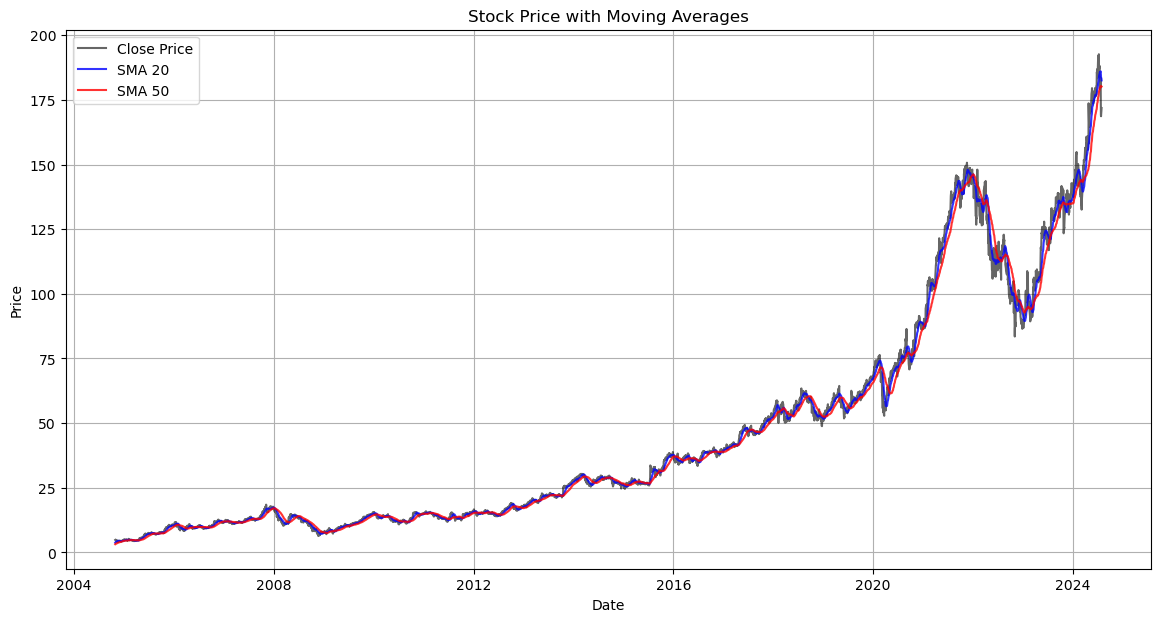

In [3]:
def plot_moving_averages(data):
    plt.figure(figsize=(14, 7))
    plt.plot(data.index, data['Close'], label='Close Price', color='black', alpha=0.6)
    plt.plot(data.index, data['SMA_20'], label='SMA 20', color='blue', alpha=0.8)
    plt.plot(data.index, data['SMA_50'], label='SMA 50', color='red', alpha=0.8)
    plt.title('Stock Price with Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_moving_averages(data)


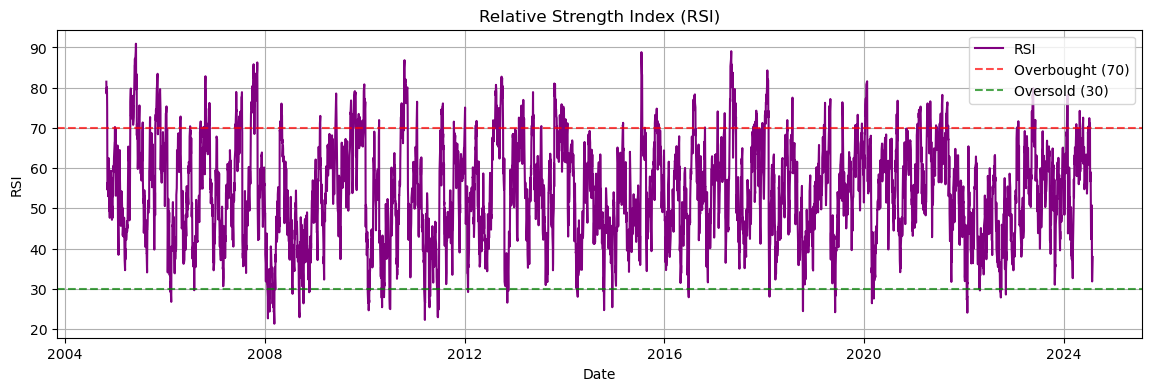

In [4]:
def plot_rsi(data):
    plt.figure(figsize=(14, 4))
    plt.plot(data.index, data['RSI'], label='RSI', color='purple')

    plt.axhline(70, linestyle='--', color='red', alpha=0.7, label='Overbought (70)')
    plt.axhline(30, linestyle='--', color='green', alpha=0.7, label='Oversold (30)')


    plt.title('Relative Strength Index (RSI)')
    plt.xlabel('Date')
    plt.ylabel('RSI')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_rsi(data)


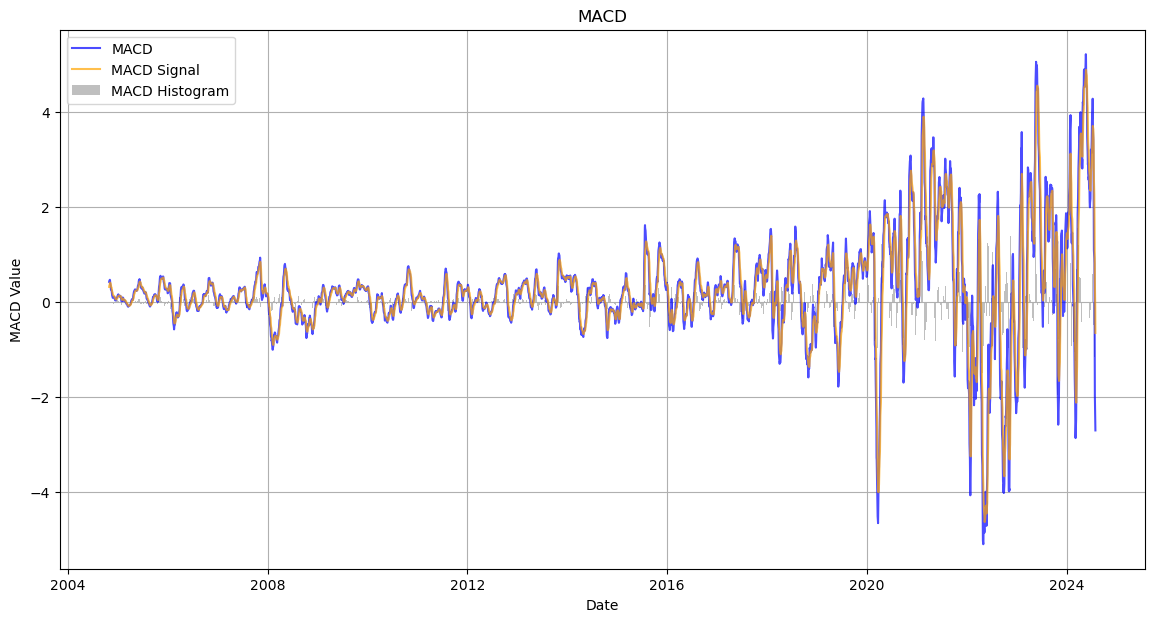

In [5]:
def plot_macd(data):
    plt.figure(figsize=(14, 7))
    plt.plot(data.index, data['MACD'], label='MACD', color='blue', alpha=0.7)
    plt.plot(data.index, data['MACD_Signal'], label='MACD Signal', color='orange', alpha=0.7)
    plt.bar(data.index, data['MACD_Hist'], label='MACD Histogram', color='gray', alpha=0.5)
    plt.title('MACD')
    plt.xlabel('Date')
    plt.ylabel('MACD Value')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_macd(data)


In [6]:
def calculate_atr(data, period=14):
    # Calculate True Range (TR)
    data['Previous_Close'] = data['Close'].shift(1)
    data['TR1'] = data['High'] - data['Low']
    data['TR2'] = abs(data['High'] - data['Previous_Close'])
    data['TR3'] = abs(data['Low'] - data['Previous_Close'])
    data['TR'] = data[['TR1', 'TR2', 'TR3']].max(axis=1)

    data['ATR'] = data['TR'].rolling(window=period, min_periods=1).mean()

    data.drop(['Previous_Close', 'TR1', 'TR2', 'TR3', 'TR'], axis=1, inplace=True)
    return data

# Example DataFrame
data = pd.DataFrame({
    'Date': pd.date_range(start='2020-01-01', periods=100),
    'Close': np.random.rand(100),
    'High': np.random.rand(100) + 0.5,
    'Low': np.random.rand(100) - 0.5,
    'Volume': np.random.randint(1000, 5000, size=100)
})

data.set_index('Date', inplace=True)

data = calculate_atr(data)
print(data.head())


               Close      High       Low  Volume       ATR
Date                                                      
2020-01-01  0.956874  1.431888  0.113320    3940  1.318568
2020-01-02  0.198033  1.002242  0.023787    2332  1.148511
2020-01-03  0.327423  0.505219 -0.082174    3161  0.961472
2020-01-04  0.539575  0.565765 -0.418441    4906  0.967155
2020-01-05  0.965774  0.773805 -0.340978    4909  0.996681
